# Tina Liu 

## Research question/interests

Briefly describe your research question or interests here.

In this research, I am interested in investigating whether or not gender impacts student performance on standarized exams. I specifically want to look at the two different sex (male/female) in correlation to math, reading, and writing scores. This is an important question to look at because, as a female, I've always grown up to the idea that 'boys are smarter than girls'. Therefore, through this research, I want to take the opportunity to highlight the dangers in generalizing by checking if females perform better in certain subjecs than males. By the end of this research, I hope to find any evidence that will debunk this stereotype and check if there is a correlation between gender and standarized tests. 

I hope to also check if completed test preparation courses for each sex impact the correlation between gender and standarized tests based 

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns

In [144]:
dp = pd.read_csv('../data/raw/exams.csv')

In [145]:
print(dp)

     gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67         

Here I am printing out the original number of rows and columns to see if there are any outliers. I did the same for the gender column to check if there were other genders to account for in my research. 

In [146]:
print("Original number of rows and columns:", dp.shape)
print("All columns in data set: ", dp.columns)
list(d["gender"].unique())

Original number of rows and columns: (1000, 8)
All columns in data set:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


['male', 'female']

# Task 2
## Data Analysis Pipeline 
    1. Load Data 
       - Check file types and encodings.
       - Skip rows and columns as needed. 
    2. Clean Data 
       - drop any columns not needed. 
       - deal with missing values. 
    3. Process Data 
       - creates new columns (weighted average) 
       - Deal with outliers 
    4. Wrangle Data 
       - Restructure columns and rows

For my data set, I simplified the data set to only look at 4 different columns: gender, math score, reading score, and writing score by dropping the columns I am not working with. For the math,reading, and writing scores, I simplified the data to only have values between 0 and 100 to get rid of any outliers like negative values or values above 100. I also dropped any values that are NA just in case. Finally, I created a new column that totals the average of all the scores for each gender.  

In [147]:
dp = dp[dp['math score'].between(0.0,100.0)]
dp = dp[dp['reading score'].between(0.0,100.0)]
dp = dp[dp['writing score'].between(0.0,100.0)]
dp = dp.dropna()
dp = dp.rename(columns={'gender':'sex'}) 
dp = dp.drop(columns = ["race/ethnicity","parental level of education", "lunch", "test preparation course"])
dp['total score']=(dp['reading score']+dp['math score']+dp['writing score'])/3
dp

,sex,math score,reading score,writing score,total score
0,male,67,67,63,65.666667
1,female,40,59,55,51.333333
2,male,59,60,50,56.333333
3,male,77,78,68,74.333333
4,male,78,73,68,73.000000
...,...,...,...,...,...
995,male,73,70,65,69.333333
996,male,85,91,92,89.333333
997,female,32,35,41,36.000000
998,female,73,74,82,76.333333


Looks at the mean, standard deviation (25%, 50%, 75%), min, and max for each score (math,reading, writing, and total). This graph is important because I wanted to check if there were any outliers so I can add changes to my analysis pipeline. Additionally, it is nice to have values to compare to just in case my graphs don't turn out the way I want them to be. Additionally, it is nice to compare the data to the original data to see if therer are any changes. In the next graph, I wanted to visually have it to see if it would be useful or not.  

In [148]:
dp.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,math score,reading score,writing score,total score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,67.712000
std,15.402871,14.737272,15.600985,14.514244
min,13.000000,27.000000,23.000000,21.666667
25%,56.000000,60.000000,58.000000,58.583333
50%,66.500000,70.000000,68.000000,67.333333
75%,77.000000,79.000000,79.000000,78.333333
max,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:ylabel='Frequency'>

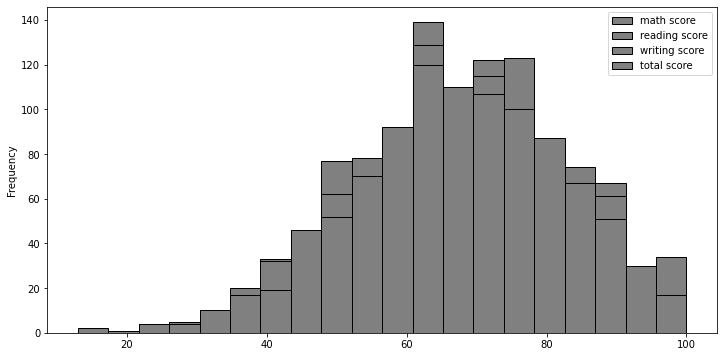

In [149]:
dp.plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

This graph isn't useful because it only averages out the scores for both sexes. It doesn't answer my research questions or interests. However, this graph inspired me to find graphs that specifically focus on gender vs. scores by using barplots instead of plots. It only visualizes the values from above. 

## Task 2 - Milestone 3 
Here I used .describe() for each standarized test to check the standard deviation, min, mean, and max in order to conduct my analysis accurately. I used .groupby() to group the scores by each gender to look at the correlation between gender and scores. After that I used graphs to visualize these values. These are important values because it supports my research interests on whether or not there is data that supports that males are smarter than females. Looking at the means, you can see that females on average perform better based on their reading and writing scores. 

In [150]:
columns = ['gender','math score','reading score','writing score']
graph = pd.read_csv('../data/raw/exams.csv', usecols=columns) 
print("reading scores")
print(d['reading score'].groupby(d["gender"]).describe())
print()
print("math scores")
print(d['math score'].groupby(d["gender"]).describe())
print()
print("writing scores")
print(d['writing score'].groupby(d["gender"]).describe())

reading scores
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  483.0  71.888199  14.660470  29.0  62.0  72.0  83.0  100.0
male    517.0  66.305609  14.305073  27.0  57.0  67.0  77.0  100.0

math scores
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  483.0  63.196687  15.490079  13.0  53.0  63.0  75.0  100.0
male    517.0  69.384913  14.719365  29.0  59.0  70.0  79.0  100.0

writing scores
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  483.0  71.708075  15.238072  23.0  62.0  72.0  83.0  100.0
male    517.0  64.029014  15.025983  23.0  54.0  64.0  74.0  100.0


### For this specific graph, I compared the two different sex (male/female) with their specific readings scores to see which gender has a higher standard deviation/mean.
This graph is important to my research question/interests because it looks at the averages for reading scores and doesn't support the idea that males are smarter than females. Here the mean for males is 66.3% whereas the females have a mean of 71.8%. 

<AxesSubplot:xlabel='gender', ylabel='reading score'>

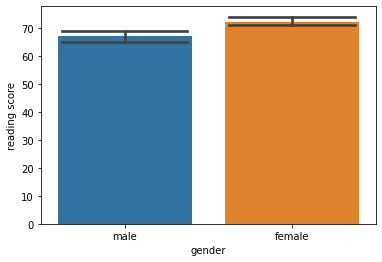

In [151]:
d = pd.read_csv('../data/raw/exams.csv')
sns.barplot(x='gender',y='reading score', data=d, estimator=np.median, capsize =0.75)

### For this specific graph, I compared the two different sex(male/female) with their specific math scores and seeing which gender has a higher standard deviation/mean
This graph is important to my research question/interests because it looks at the averages for math scores. However, this is the only subject where males perform better than females. This is interesting data to see because on average, males do better than females by about 6%. I wonder if there are any other factors that impact male performance in math in comparison to other subjects. Whether it's socially or physically, it's interesting to see how this graph/data differs from other subjects. 

<AxesSubplot:xlabel='gender', ylabel='math score'>

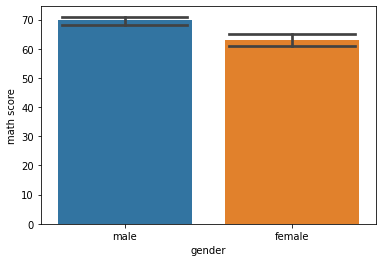

In [152]:
d = pd.read_csv('../data/raw/exams.csv')
sns.barplot(x='gender',y='math score', data=d,estimator=np.median, capsize = 0.75)

### For this specific graph, I compared the two different sex(male/female) with their specific writing scores and seeing which gender has a higher standard deviation.  
This graph is important to my research question/interests because it looks at the averages for writing scores and supports the idea the females are smarter than males. In comparison to other scores, females perform the best in writing. I'm curious to see if there are any other factors that contribute to the higher average. 

<AxesSubplot:xlabel='gender', ylabel='writing score'>

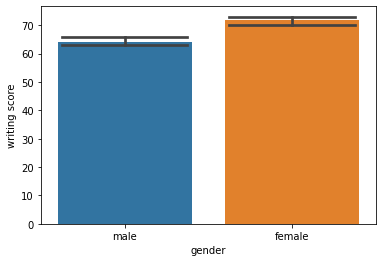

In [153]:
d = pd.read_csv('../data/raw/exams.csv')
sns.barplot(x='gender',y='writing score', data=d, estimator=np.median, capsize =0.75)

### For this specific graph, I compared the two different sex(male/female) with their averages of writing, math, and reading scores and seeing which gender has a higher standard deviation.  

<AxesSubplot:xlabel='gender', ylabel='average score'>

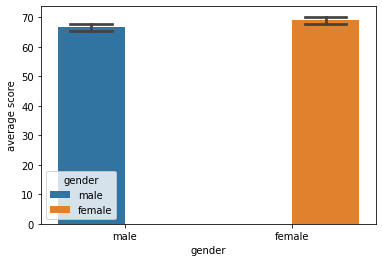

In [154]:
d = pd.read_csv('../data/raw/exams.csv')
d['average score']=(d['reading score']+d['math score']+d['writing score'])/3
sns.barplot(x='gender',y='average score', data=d, hue='gender', capsize =0.25)

## Task 3 - Milestone 3 (Method Chaining)

Here I am just apply method chaining to my data. 

In [155]:
d = pd.read_csv('../data/raw/exams.csv')

df = (
    pd.read_csv('../data/raw/exams.csv')
    .drop(columns = ["race/ethnicity","parental level of education", "test preparation course","lunch"])
    .dropna()
    .rename(columns={'gender': 'Sex', 'math score': 'Math Score', 'reading score': 'Reading Score', 'writing score': 'Writing Score'},)
    .assign(total=(d['reading score']+d['math score']+d['writing score'])/3)
)
print(df)
    

        Sex  Math Score  Reading Score  Writing Score      total
0      male          67             67             63  65.666667
1    female          40             59             55  51.333333
2      male          59             60             50  56.333333
3      male          77             78             68  74.333333
4      male          78             73             68  73.000000
..      ...         ...            ...            ...        ...
995    male          73             70             65  69.333333
996    male          85             91             92  89.333333
997  female          32             35             41  36.000000
998  female          73             74             82  76.333333
999    male          65             60             62  62.333333

[1000 rows x 5 columns]


In [156]:
from project_functions2 import load_and_process 
d = load_and_process('../data/raw/exams.csv')
d

,Sex,Math Score,Reading Score,Writing Score,average
0,male,67,67,63,65.666667
1,female,40,59,55,51.333333
2,male,59,60,50,56.333333
3,male,77,78,68,74.333333
4,male,78,73,68,73.000000
...,...,...,...,...,...
995,male,73,70,65,69.333333
996,male,85,91,92,89.333333
997,female,32,35,41,36.000000
998,female,73,74,82,76.333333


# Task 4
## Figure 1 
Here I compare the total average of reading,math, and writing in relation to gender to show that on average females perform higher in standarized tests. 

gender
female    68.930987
male      66.573179
Name: average score, dtype: float64


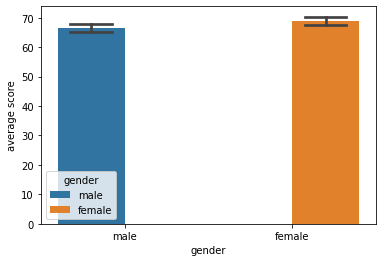

In [157]:
d = pd.read_csv('../data/raw/exams.csv')
d['average score']=(d['reading score']+d['math score']+d['writing score'])/3
sns.barplot(x='gender',y='average score', data=d, hue='gender', capsize =0.25)
print(d['average score'].groupby(d["gender"]).mean())

### Figure 2
The first average I look at is the readings scores in relation to each sex. I apply .mean() and .describe() to each graph and it displays the standard deviation for readings scores. 

gender
female    71.888199
male      66.305609
Name: reading score, dtype: float64
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  483.0  71.888199  14.660470  29.0  62.0  72.0  83.0  100.0
male    517.0  66.305609  14.305073  27.0  57.0  67.0  77.0  100.0


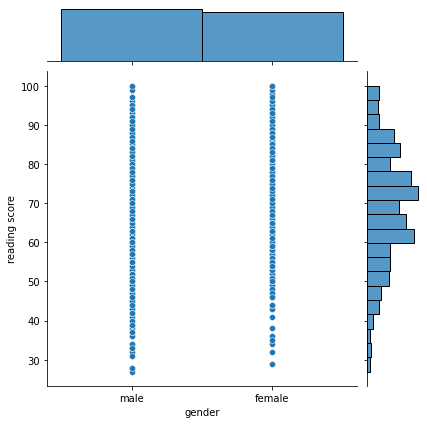

In [158]:
d = pd.read_csv('../data/raw/exams.csv')
sns.jointplot(data = d, x="gender", y="reading score")
print(d['reading score'].groupby(d["gender"]).mean())
print(d['reading score'].groupby(d["gender"]).describe())

### Figure 3 
The averages I look at is the writing scores in relation to each sex. I apply .mean() and .describe() to each graph and it displays the standard deviation for writing scores. 

gender
female    71.708075
male      64.029014
Name: writing score, dtype: float64
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  483.0  71.708075  15.238072  23.0  62.0  72.0  83.0  100.0
male    517.0  64.029014  15.025983  23.0  54.0  64.0  74.0  100.0


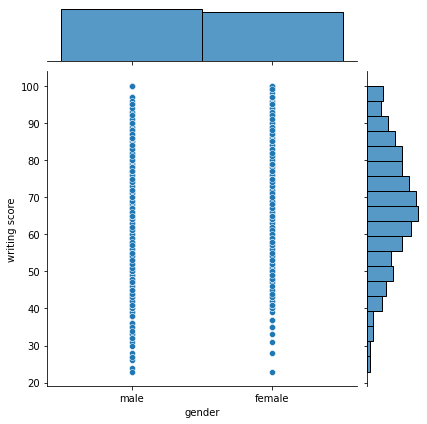

In [159]:
d = pd.read_csv('../data/raw/exams.csv')
sns.jointplot(data = d, x="gender", y="writing score")
print(d['writing score'].groupby(d["gender"]).mean())
print(d['writing score'].groupby(d["gender"]).describe())

### Figure 4
The averages I look at is the math scores in relation to each sex.I apply .mean() and .describe() to each graph and it displays the standard deviation for math scores.  

gender
female    63.196687
male      69.384913
Name: math score, dtype: float64
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  483.0  63.196687  15.490079  13.0  53.0  63.0  75.0  100.0
male    517.0  69.384913  14.719365  29.0  59.0  70.0  79.0  100.0


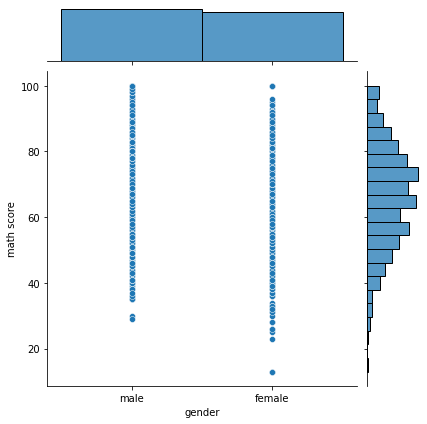

In [160]:
d = pd.read_csv('../data/raw/exams.csv')
sns.jointplot(data = d, x="gender", y="math score")
print(d['math score'].groupby(d["gender"]).mean())
print(d['math score'].groupby(d["gender"]).describe())

## Conclusion 
After conducting my research on the different averages of the 3 different test scores in relation to sex, the data showed that females on average did better than males, specifically in writing and reading. The only test score where males did slightly better than females is in math. On average, females did 2.357808% better than males when totaling up the average of all test scores. We can see the difference in figure 1 where females averaged 68.930987% whereas males averaged 66.573179%. In figures 2,3,and 4 each figure shows the test scores for each type of standarized test. In figure 2, females averaged 71.9% and males averaged 66.3% for reading scores, which is a 5.6% difference. In figure 3, females averaged 71.7% and males averaged 64.0% for writing scores, which is a 7.7% difference. Lastly, in figure 4, females averaged 63.2% and males averaged 69.4% for math scores, which is a -6.2% difference. 

Looking at the different averages for each test score, we can't be super confident to say that females are smarter than males. However, we can say that females typically do better than males in standarized tests based on the averages and standard deviations per figure. In fact, these averages support the idea that we shouldn't stereotype males into thinking they are smarter because the data says otherwise. 

After looking at the data and different figures, I'm still interested to see if there are other aspects that would impact the grades for each gender. Overall, this data set was very interesting to break down because it displays a correlation between gender and test scores. 